In [1]:
from scipy import signal as sig
import matplotlib.pyplot as plt
import numpy as np

\begin{eqnarray}
\sf \frac{d\delta}{dt} &=& \sf \Omega_b \left(\omega -1 \right) \\
\sf \frac{d\omega}{dt} &=& \sf \frac{1}{2H}\left(p_m - p_e  - K_d \left(\omega -1 \right)\right) 
\end{eqnarray}

$$\sf p_e = \frac{V_t V_\infty}{X} \sin{\delta}$$

$$\sf V_t = V_t^\star + \Delta V_s$$

$$\sf p_e = \underbrace{\frac{V_t^\star V_\infty}{X} \sin{\delta}}_{p_e^\star} +               \underbrace{\frac{\Delta V_s V_\infty}{X} \sin{\delta}} _{\Delta p_e} $$

\begin{eqnarray}
\sf \frac{d\delta}{dt} &=& \sf \Omega_b \left(\omega -1 \right) \\
\sf \frac{d\omega}{dt} &=& \sf \frac{1}{2H}\left(p_m - p_e^\star - \Delta p_e - K_d \left(\omega -1 \right)\right) 
\end{eqnarray}

$$\sf \Delta p_e = K_{stab} \Delta \omega$$

$$\sf \Delta p_e = \frac{\Delta V_s V_\infty}{X} \sin{\delta}$$

$$\sf K_{stab} \Delta \omega= \frac{\Delta V_s V_\infty}{X} \sin{\delta}$$

$$\sf V_s \propto K_{stab} \Delta \omega$$

transfer function between $\sf V_{pss}$ and $\sf V_s$:

<img src="gen_avr_vs.svg" />



 

<img src="k13p2_avr100_vs.png"  width=400/>

$$ \sf G_g(s) = \frac{1}{ T'_{d0}s  + 1}$$


$$ \sf  T  = \frac{G_g}{ 1 + K_a  G_g}$$

$$ \sf  T  = \frac{K_a \frac{1}{ T'_{d0}s  + 1}}{ 1 + K_a \frac{1}{ T'_{d0}s  + 1}} = \frac{1}{K_a}\frac{1}{ \frac{T'_{d0}}{K_a}s  + 1} $$

In [2]:
Td10 = 8.0 

G_g = sig.lti([1], [Td10, 1]) # Creamos el sistema

K_a = 50.0

G_ex = sig.lti([K_a], [Td10, 1.0+ K_a])



T = np.linspace(0.0,3.0,100)
T, Y = sig.step2(G_ex, 0.0, T)

w, mag, phase = sig.bode(G_ex) # Diagrama de bode: frecuencias, magnitud y fase
                            


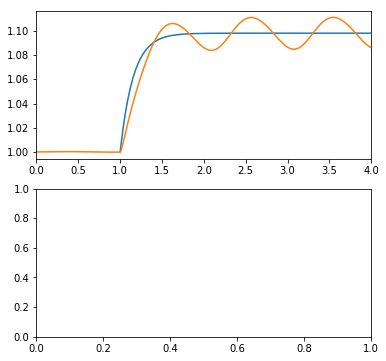

In [3]:
dig_out = np.loadtxt(open("k13p2_avr100_vs.csv","r"),delimiter=",",skiprows=2)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6))
ax1.plot(T+1.0, 0.1*Y+1.0) # Eje x logarítmico
ax1.plot(dig_out[:,0], dig_out[:,1]) # Eje x logarítmico
ax1.set_xlim(0.0,4.0)
fig.savefig('hola.png')

$ H(s) = \frac{K}{(s / \omega_0) + 1}$

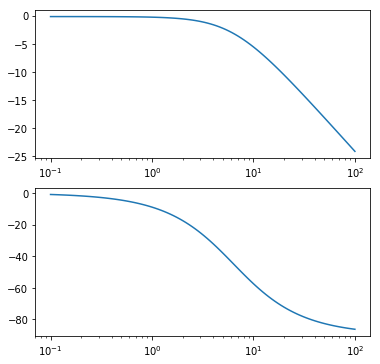

In [4]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6))
ax1.semilogx(w, mag) # Eje x logarítmico
ax2.semilogx(w, phase) # Eje x logarítmico
fig.savefig('hola.png')